# Regresión Poisson

Modelo simple aplicado a set de datos

## 1. Importación de bibliotecas y datos:

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_col

# Omiting WARNINGS
import warnings
warnings.filterwarnings('ignore')

/Applications/anaconda/envs/PythonData/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read data
fertil_df = pd.read_stata('FERTIL2.dta')
fertil_df.head()

,mnthborn,yearborn,age,electric,radio,tv,bicycle,educ,ceb,agefbrth,...,heduc,agesq,urban,urb_educ,spirit,protest,catholic,frsthalf,educ0,evermarr
0,5,64,24,1.0,1.0,1.0,1.0,12,0,NaN,...,NaN,576,1,12,0,0,0,1,0,0
1,1,56,32,1.0,1.0,1.0,1.0,13,3,25.0,...,12.0,1024,1,13,0,0,0,1,0,1
2,7,58,30,1.0,0.0,0.0,0.0,5,1,27.0,...,7.0,900,1,5,1,0,0,0,0,1
3,11,45,42,1.0,0.0,1.0,0.0,4,3,17.0,...,11.0,1764,1,4,0,0,0,0,0,1
4,5,45,43,1.0,1.0,1.0,1.0,11,2,24.0,...,14.0,1849,1,11,0,1,0,1,0,1


### Datos importados:
    1. mnthborn                 month woman born
    2. yearborn                 year woman born
    3. age                      age in years
    4. electric                 =1 if has electricity
    5. radio                    =1 if has radio
    6. tv                       =1 if has tv
    7. bicycle                  =1 if has bicycle
    8. educ                     years of education
    9. ceb                      children ever born
    10. agefbrth                 age at first birth
    11. children                 number of living children
    12. knowmeth                 =1 if know about birth control
    13. usemeth                  =1 if ever use birth control
    14. monthfm                  month of first marriage
    15. yearfm                   year of first marriage
    16. agefm                    age at first marriage
    17. idlnchld                 'ideal' number of children
    18. heduc                    husband's years of education
    19. agesq                    age^2
    20. urban                    =1 if live in urban area
    21. urbeduc                  urban*educ
    22. spirit                   =1 if religion == spirit
    23. protest                  =1 if religion == protestant
    24. catholic                 =1 if religion == catholic
    25. frsthalf                 =1 if mnthborn <= 6
    26. educ0                    =1 if educ == 0
    27. evermarr                 =1 if ever married


Utilizamos los datos para estimar los efectos de la educación sobre la fertilidad de las mujeres en Botswana. La variable de respuesta es el número de niños vivos. Usamos una función de regresión exponencial estándar, y las variables explicativas son años de escolaridad (educ), una edad cuadrática e indicadores binarios para casados, que viven en un área urbana, que tienen electricidad y que poseen un televisor.

También se incluye un modelo de regresión lineal, con los errores estándar de OLS habituales.

## 2. Análisis descriptivo

In [3]:
fertil_df = fertil_df[['children' ,'educ', 'age', 'agesq', 'evermarr', 'urban', 'electric', 'tv']].dropna()

In [4]:
fertil_df.children.max(), fertil_df.children.min()

(13, 0)

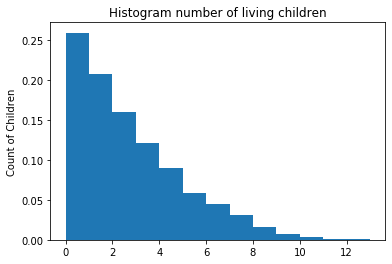

In [5]:
# plotting histogram in order to see
plt.hist(fertil_df.children, bins = 13, normed = True, histtype='bar')

#plt.legend()
plt.ylabel('Count of Children')
plt.title('Histogram number of living children')

plt.show()

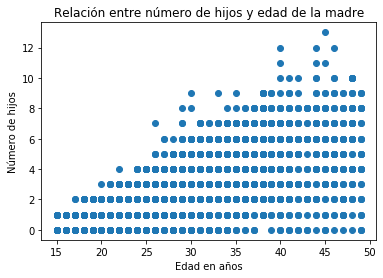

In [6]:
# Scatter Plot 1:
# Getting x and y values
x_values = fertil_df['age']
y_values = fertil_df['children']

# Plot scatter plot
plt.scatter(x_values, y_values, marker = 'o')
#plt.grid()

plt.title('Relación entre número de hijos y edad de la madre')
plt.xlabel('Edad en años')
plt.ylabel('Número de hijos')

# Save the Figure
#plt.savefig("Fig1.png")

# Show plot
plt.show()

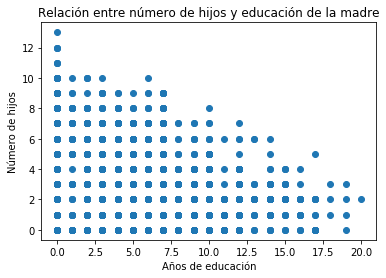

In [7]:
# Scatter Plot 2:
# Getting x and y values
x_values = fertil_df['educ']
y_values = fertil_df['children']

# Plot scatter plot
plt.scatter(x_values, y_values, marker = 'o')
#plt.grid()

plt.title('Relación entre número de hijos y educación de la madre')
plt.xlabel('Años de educación')
plt.ylabel('Número de hijos')

# Save the Figure
#plt.savefig("Fig2.png")

# Show plot
plt.show()

## 3. Estimación

In [8]:
# Definición de variables:
Y = fertil_df['children']
X = fertil_df[['educ', 'age', 'agesq', 'evermarr', 'urban', 'electric', 'tv']]
X = sm.add_constant(X)

In [9]:
# OLS:
Model_OLS = sm.OLS(Y, X)
Model_OLS_res = Model_OLS.fit()
print(Model_OLS_res.summary())

                            OLS Regression Results                            
Dep. Variable:               children   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     893.9
Date:                Sun, 10 May 2020   Prob (F-statistic):               0.00
Time:                        20:17:17   Log-Likelihood:                -7720.2
No. Observations:                4358   AIC:                         1.546e+04
Df Residuals:                    4350   BIC:                         1.551e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3938      0.245    -13.878      0.0

In [10]:
# Poisson:
poisson_mod = sm.Poisson(Y, X)
poisson_res = poisson_mod.fit()
print(poisson_res.summary())

Optimization terminated successfully.
         Current function value: 1.490835
         Iterations 7
                          Poisson Regression Results                          
Dep. Variable:               children   No. Observations:                 4358
Model:                        Poisson   Df Residuals:                     4350
Method:                           MLE   Df Model:                            7
Date:                Sun, 10 May 2020   Pseudo R-squ.:                  0.3219
Time:                        20:17:18   Log-Likelihood:                -6497.1
converged:                       True   LL-Null:                       -9580.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3748      0.163    -33.001      0.000      -5.694      -5.056
educ          -0.0217      0.

In [11]:
# Resultados:
results_table = summary_col(results=[Model_OLS_res, poisson_res],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model OLS',
                                         'Model Poisson'],
                            regressor_order=['const',
                                             'educ', 
                                             'age', 
                                             'agesq', 
                                             'evermarr', 
                                             'urban', 
                                             'electric', 
                                             'tv'])

results_table.add_title('Table 1 - Comparative OLS and Poisson Regressions')

print(results_table)

Table 1 - Comparative OLS and Poisson Regressions
         Model OLS Model Poisson
--------------------------------
const    -3.39***  -5.37***     
         (0.24)    (0.16)       
educ     -0.06***  -0.02***     
         (0.01)    (0.00)       
age      0.27***   0.34***      
         (0.02)    (0.01)       
agesq    -0.00***  -0.00***     
         (0.00)    (0.00)       
evermarr 0.68***   0.31***      
         (0.05)    (0.02)       
urban    -0.23***  -0.09***     
         (0.05)    (0.02)       
electric -0.26***  -0.12***     
         (0.08)    (0.04)       
tv       -0.25***  -0.14***     
         (0.09)    (0.05)       
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [12]:
# Mean matrix values:
X_mean = pd.DataFrame(fertil_df[['educ', 'age', 'agesq', 'evermarr', 'urban', 'electric', 'tv']].mean()).T
X_mean['const'] = 1
X_mean = X_mean[['const', 'educ', 'age', 'agesq', 'evermarr', 'urban', 'electric', 'tv']]

In [13]:
# Predicted values OLS
Model_OLS_res.predict(X_mean)

0    2.267554
dtype: float64

In [14]:
# Predicted values Poisson
poisson_res.predict(X_mean)

0    1.516405
dtype: float64

In [15]:
poisson_margeff = poisson_res.get_margeff()
print(poisson_margeff.summary())

       Poisson Marginal Effects      
Dep. Variable:               children
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
educ          -0.0491      0.007     -7.416      0.000      -0.062      -0.036
age            0.7649      0.024     32.127      0.000       0.718       0.812
agesq         -0.0093      0.000    -27.246      0.000      -0.010      -0.009
evermarr       0.7137      0.056     12.768      0.000       0.604       0.823
urban         -0.1951      0.049     -3.972      0.000      -0.291      -0.099
electric      -0.2733      0.088     -3.102      0.002      -0.446      -0.101
tv            -0.3281      0.108     -3.052      0.002      -0.539      -0.117
